## Master in Artificial Intelligence, USC, UDC, UVigo. 2023/2024
## COMPUTER VISION I 

### Topic 6: Matching    

In [55]:
images_path = './datasets_lab6/images/'

In [56]:
import sys, cv2
from matplotlib import pyplot as plt
import numpy as np

#### Invariant measures: SIFT (Scale-Invariant Feature Transform)
OpenCV's implementation of SIFT includes the functions `cv2.SIFT_create()` and `sift.detect()`+`sift.compute()` or all-in-one `sift.detectAndCompute`. Additionally, `cv2.drawKeypoints()` for drawing the keypoints.

- `sift=cv2.SIFT_create()` constructs a SIFT object.   
- `kp=sift.detect()` finds the keypoints in the images: the input is an image, the output is the resulting list of keypoints. You can pass a mask to search only within a part of the image. Each keypoint is a special structure with several attributes: (x,y) coordinates, size of the meaningful neighbourhood, angle specifying its orientation, etc. 
- `img=cv.drawKeypoints()` draws small circles at the locations of keypoints. Using the flag, `cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS`, it draws the circles with different sizes and it shows the orientation of the keypoint.   
- `sift.compute()` computes the descriptors.   
- `sift.detectAndCompute()`directly finds keypoints and descriptors in a single step.

**Exercise 1:** Compute and visualize the SIFT descriptors of the image `building-600by600.tif`.

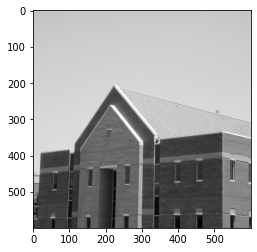

Number of keypoints:  598


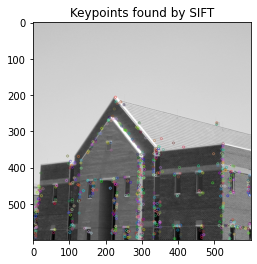

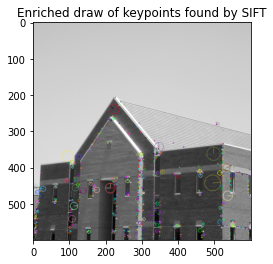

(598, 128)


In [57]:
img = cv2.imread(images_path + 'building-600by600.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')
plt.show()

#Create SIFT object
sift = cv2.SIFT_create()
#Detect SIFT in image
kp = sift.detect(gray, None)
print("Number of keypoints: ",len(kp))

#Draw keypoints as small circles
img = cv2.drawKeypoints(gray, kp, img)
plt.imshow(img, cmap='gray'), plt.title('Keypoints found by SIFT')
plt.show()

#Enriched draw keypoints as circles with size of keypoint and orientation
img = cv2.drawKeypoints(gray, kp, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img, cmap='gray'), plt.title('Enriched draw of keypoints found by SIFT')
plt.show()

#Compute the descriptor (des), first method
kp, des = sift.compute(gray, kp)

#Detect keypoint (kp) and calculate descriptors (des), all-in-one, second method
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None) 
# kp will be a list of keypoints and des is a numpy array of shape Number_of_Keypoints x 128. 128 is the size of the descriptor vector
print(des.shape)

**Exercise 2 [0.10 pts]: Using SIFT for image matching**    
Match the image `building-600by600.tif` with the sub-subimage `building-600by600-subimage.jpg`. 
We will use the Brute-Force Matcher implemented in OpenCV by means of function `cv2.BFMatcher()`. Try different values of *per*, which represents the factor for distance within descriptors to be considered a match. Which value is a good compromise between few mistakes and a good number of matches?

Number of keypoints in image:  598
Number of keypoints in subimage:  39


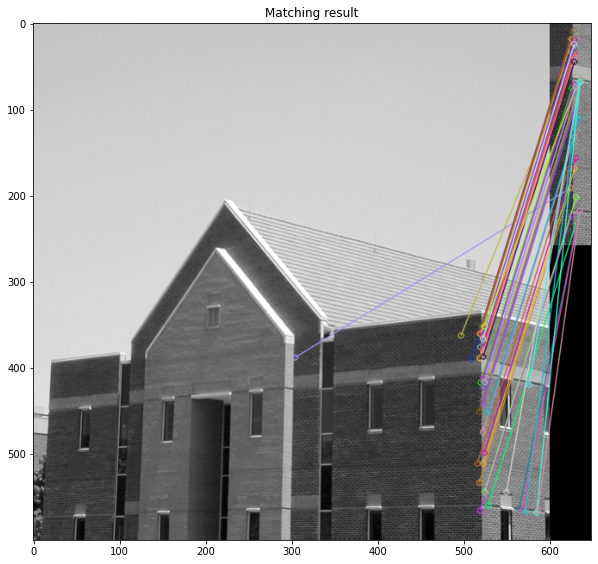

Number of matches: 39


In [58]:
img1 = cv2.imread(images_path + 'building-600by600.tif',cv2.IMREAD_GRAYSCALE)         
img2 = cv2.imread(images_path + 'building-600by600-subimage.jpg',cv2.IMREAD_GRAYSCALE) 

#Initiate SIFT detector
sift = cv2.SIFT_create()
#Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None) 
print("Number of keypoints in image: ",len(kp1))
kp2, des2 = sift.detectAndCompute(img2, None) 
print("Number of keypoints in subimage: ",len(kp2))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test to determine what it is a (good) match
good = []

per = 0.718         # small distance, only very clear matches pass the threshold     

for m,n in matches:
    if m.distance < per*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10,10))
plt.imshow(img3), plt.title('Matching result'), plt.show()

print('Number of matches:', len(good))

### Your answer
The number of the keypoints in the subimage is 39, and the number of the matches is 39. To obtain this result, we adjust the value of the parameter per to 0.718. Some of the matches are incorrect, but the most of the matches are correct.

**Exercise 3 [0.10 pts]: Using SIFT for image matching, effect of rotation**    
Match again the image ```building-600by600.tif```, and the subimage ```building-600by600-subimage.jpg``` after rotating it 5º counterclockwise. Try different *per* values for matching, including the optimal *per* (good compromise few mistakes / lot of matches) found before. Is it still an appropriate value? If not, what would you do to reduce the number of mistakes in this case?

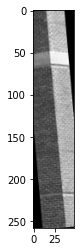

Number of keypoints in image:  598
Number of keypoints in subimage:  81


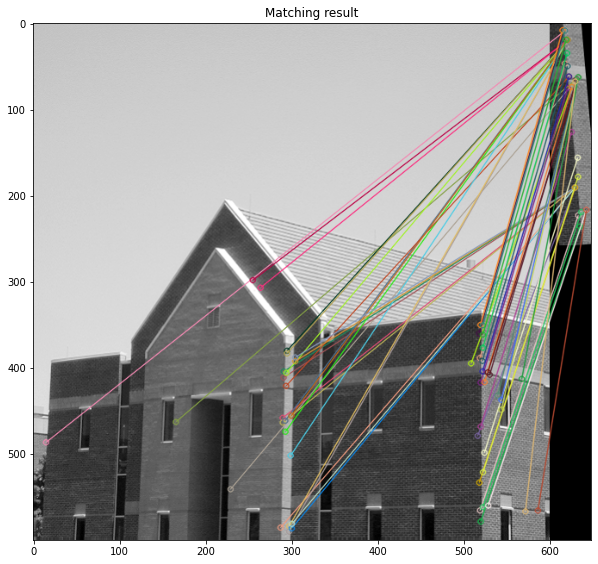

Number of matches: 52


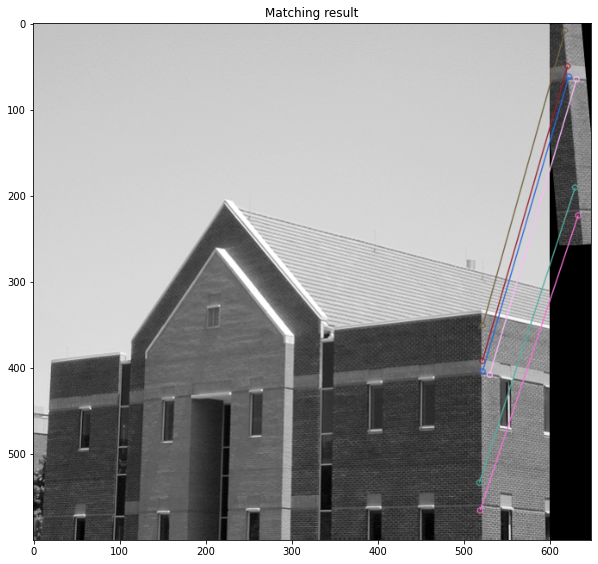

Number of matches: 6


In [59]:
# Rotate subimage
rows,cols = img2.shape
M2 = cv2.getRotationMatrix2D((cols/2,rows/2),5,1)
img2_rot = cv2.warpAffine(img2,M2,(cols, rows))
plt.imshow(img2_rot, cmap='gray')
plt.show()

#Initiate SIFT detector
sift = cv2.SIFT_create()
#Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None) 
print("Number of keypoints in image: ", len(kp1))
kp2, des2 = sift.detectAndCompute(img2_rot, None) 
print("Number of keypoints in subimage: ", len(kp2))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []

#Option 1
per = 0.718
img1_cop=img1.copy()
for m,n in matches:
    if m.distance < per*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1_cop, kp1, img2_rot, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


plt.figure(figsize=(10, 10))
plt.imshow(img3), plt.title('Matching result')
plt.show()
print('Number of matches:', len(good))

#Option 2
per = 0.32
img1_cop=img1.copy()

good=[]
for m,n in matches:
    if m.distance < per*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img4 = cv2.drawMatchesKnn(img1_cop, kp1, img2_rot, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)



plt.figure(figsize=(10, 10))
plt.imshow(img4), plt.title('Matching result')
plt.show()


print('Number of matches:', len(good))

With the optimal value calculated above, the number of matches has decreased and the number of misclassified matches has increased. This value is not appropriate in this case.


#### Your answer
After doing several tests we see that with per=0.32 we managed to reduce the number of errors in the detection. Furthermore, as a consequence of this, the number of matches we get is also reduced.


**Exercise 4 [0.10 pts]: Using SIFT for image matching, scaling and smoothing**    
Match again the image ```building-600by600.tif``` after smoothing it and reducing its size by half using a 3x3 box kernel, and the subimage ```building-600by600-subimage.jpg```. Try different *per* values for matching, including the optimal *per* (good compromise few mistakes / lot of matches) found before (exercise 2). Is it still an appropriate value? If not, what would you do to reduce the number of mistakes in this case?

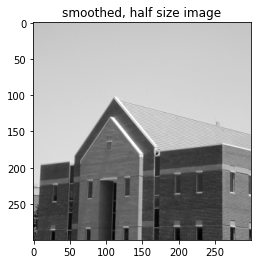

Number of keypoints in image:  182
Number of keypoints in subimage:  39


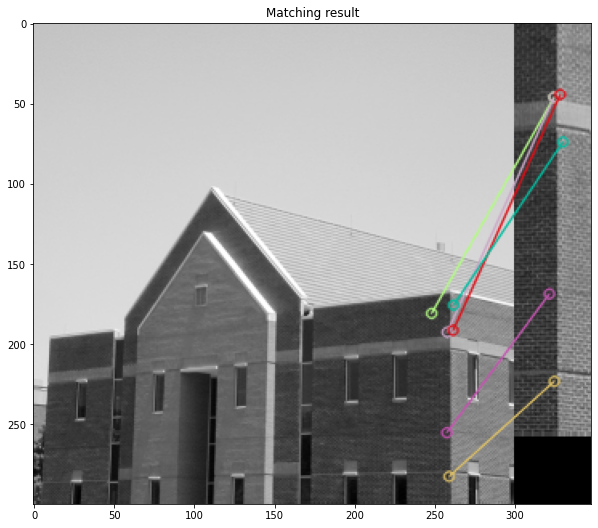

Number of matches: 6


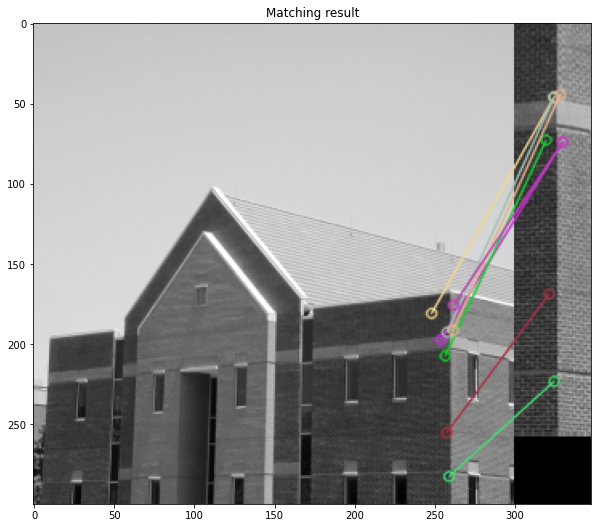

Number of matches: 8


In [60]:
# smooth and reduce image size
scale_percent = 50 # percent of original size
width = int(img1.shape[1] * scale_percent / 100)
height = int(img1.shape[0] * scale_percent / 100)
dim = (width, height)
img1_mod = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA) 
plt.imshow(img1_mod, cmap='gray'), plt.title('smoothed, half size image')
plt.show()

#Initiate SIFT detector
sift = cv2.SIFT_create()
#Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1_mod,None) 
print("Number of keypoints in image: ",len(kp1))
kp2, des2 = sift.detectAndCompute(img2,None) 
print("Number of keypoints in subimage: ",len(kp2))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []

k = 0.718

img1_cop=img1_mod.copy()
for m,n in matches:
    if m.distance < k*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1_cop, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 10))
plt.imshow(img3), plt.title('Matching result'), plt.show()

print('Number of matches:', len(good))


good = []

k = 0.76
img1_cop=img1_mod.copy()
for m,n in matches:
    if m.distance < k*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1_cop, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 10))
plt.imshow(img3), plt.title('Matching result'), plt.show()

print('Number of matches:', len(good))

#### Your answer
With the optimal value of per calculated in exercise 2 we achieve a result with fairly small errors but with few detections. By changing this parameter to 0.76 we managed to slightly increase the number of these detections without increasing the errors too much.

**Exercise 5 [0.20 pts]:**     
Finally, match the image ```building-600by600.tif```, with the subimage ```building-600by600-subimage2.png``` containing now a window. Try different values of *per*. 
- If we were interested in identifying pieces of windows in general, which *per* value would you use?
- If we were interestied in knowing which exact window it is, which *per* value would you use? which window is it?

Number of keypoints in subimage:  598
Number of keypoints in image:  10


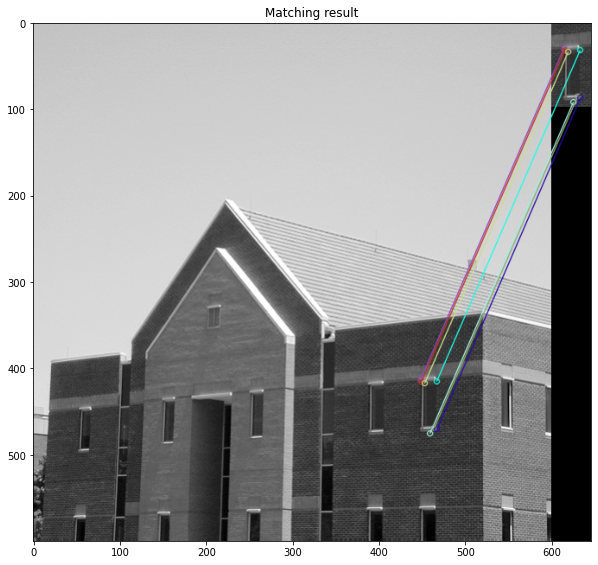

Number of matches: 7


In [61]:
img2 = cv2.imread(images_path + 'building-600by600-subimage2.png',cv2.IMREAD_GRAYSCALE) 

#Initiate SIFT detector
sift = cv2.SIFT_create()
#Find the keypioints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None) 
print("Number of keypoints in subimage: ", len(kp1))
kp2, des2 = sift.detectAndCompute(img2, None) 
print("Number of keypoints in image: ", len(kp2))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []


k=0.27

for m,n in matches:
    if m.distance < k*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 10))
plt.imshow(img3), plt.title('Matching result'), plt.show()

print('Number of matches:', len(good))

Number of keypoints in subimage:  598
Number of keypoints in image:  10


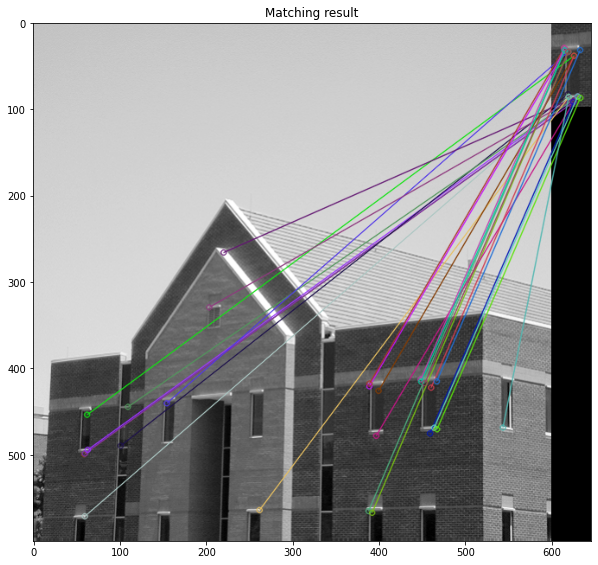

Number of matches: 26


In [62]:
### Your answer
img2 = cv2.imread(images_path + 'building-600by600-subimage2.png',cv2.IMREAD_GRAYSCALE) 

#Initiate SIFT detector
sift = cv2.SIFT_create()
#Find the keypioints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None) 
print("Number of keypoints in subimage: ", len(kp1))
kp2, des2 = sift.detectAndCompute(img2, None) 
print("Number of keypoints in image: ", len(kp2))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []

k = 0.65

for m,n in matches:
    if m.distance < k*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10, 10))
plt.imshow(img3), plt.title('Matching result'), plt.show()

print('Number of matches:', len(good))

#### Your answer

If we want to detect only features from a single window, we have to reduce the value of k. In our case we have used k=0.27. If we want to detect features of all windows we need to expand the value of k. In this case we have used k=0.65

#### Corner detector

OpenCV's function cv2.cornerHarris() implements the Harris-Stephen corner detector. The arguments are:
- `img` - Input image, it should be grayscale and float32 type.
- `blockSize` - The size of the neighbourhood considered for corner detection.
- `ksize` - Aperture parameter of Sobel derivative.
- `k` - Harris detector free parameter in the equation.

In all exercises we will keep unchanged:  blockSize=2; ksize=3

**Exercise 6:**    
Given the image 'checkerboard-clean.tif', apply the Harris detector to find the corners. 

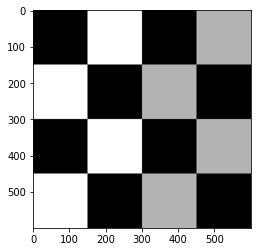

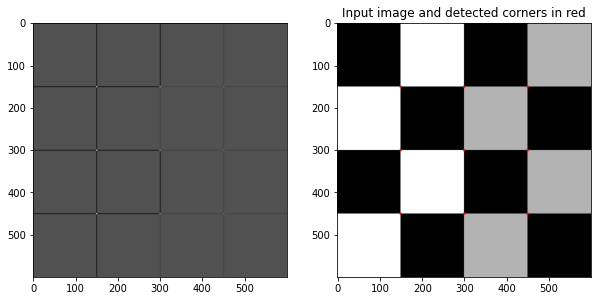

In [63]:
img = cv2.imread(images_path + 'checkerboard-clean.tif')
img_gray = cv2.imread(images_path + 'checkerboard-clean.tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    sys.exit('Input image not found, check the path')
plt.imshow(img, 'gray')

#Compute the R scores with standard k=0.04
k = 0.04
corners = cv2.cornerHarris(img_gray, 2, 3, k)  

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(corners, 'gray')

#Dilate the result for marking the corners in the output image, only for viewing. We use the cv2 implementation for dilation
corners = cv2.dilate(corners, None)

# Threshold for an optimal value, it may vary depending on the image.
# A standard threshold is T=0.01
T = 0.01

# To plot the corners in red:
img[corners > T*corners.max()] = [255, 0, 0]           

ax[1].imshow(img), ax[1].set_title('Input image and detected corners in red'), plt.show()
plt.show()

**Exercise 7 [0.15 pts]: Effect of noise.**    
Given the image 'checkerboard-noisy.tif' (added Gaussian noise with mean=0 and variance=0.01), apply the Harris detector to find the corners. Try the following parameters and explain the results:    
a) k=0.04 and T=0.01 (the defaults)   
b) k=0.1 and T=0.01   
c) k=0.1 and T=0.1  
d) k=0.04 and T=0.1  
e) k=0.04 and T=0.3  

Value of K:  0.04 Value of T:  0.01


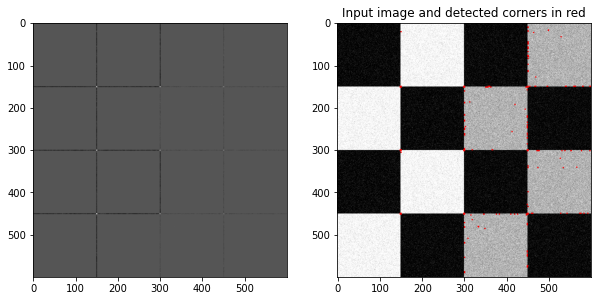

Value of K:  0.1 Value of T:  0.01


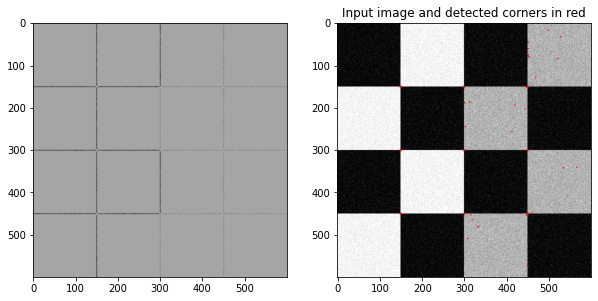

Value of K:  0.1 Value of T:  0.1


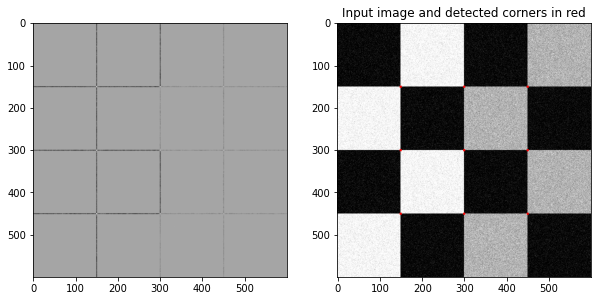

Value of K:  0.04 Value of T:  0.1


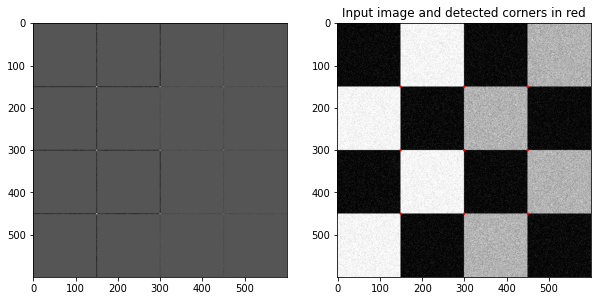

Value of K:  0.04 Value of T:  0.3


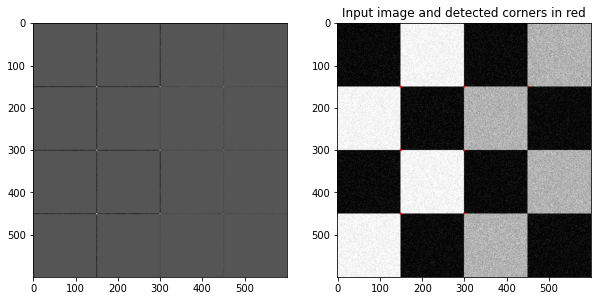

In [64]:
### your code & explanations
img = cv2.imread(images_path + 'checkerboard-noisy.tif')
img_gray = cv2.imread(images_path + 'checkerboard-noisy.tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    sys.exit('Input image not found, check the path')
#plt.title('Input image')
#plt.imshow(img, 'gray')

K=[0.04,0.1,0.1,0.04,0.04]
T=[0.01,0.01,0.1,0.1,0.3]

for i in range(len(K)):
    #Compute the R scores with standard k=0.04
    print('Value of K: ',K[i], 'Value of T: ',T[i])
    img_gray_cop=img_gray.copy()
    img_cop=img.copy()
    k = K[i]
    corners = cv2.cornerHarris(img_gray_cop, 2, 3, k)  
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(corners, 'gray')
    #Dilate the result for marking the corners in the output image, only for viewing. We use the cv2 implementation for dilation
    corners = cv2.dilate(corners, None)

    # Threshold for an optimal value, it may vary depending on the image.
    # A standard threshold is T=0.01
    t = T[i]

    # To plot the corners in red:
    img_cop[corners > t*corners.max()] = [255, 0, 0]           

    ax[1].imshow(img_cop), ax[1].set_title('Input image and detected corners in red'), plt.show()
    plt.show()

#### Your answer
- With k=0.04 and T=0.01 we manage to detect the corners but we also have many erroneous detections that do not correspond to corners.
- With k=0.1 and T=0.01 we manage to reduce erroneous detections but we still have many detections that are not corners.
- With k=0.1 and T=0.1, good corner detection is achieved without any error as was the case before.
- With k=0.04 and T=0.1 we once again achieve correct corner detection without making errors.
- With k=0.04 and T=0.3 the corners are detected without making errors but there are some corners that are not detected.

**Exercise 8 [0.15 pts]:** 
Apply the Harris detector to find corners on the image of the building (`building-600by600.tif`). Apply different parameters and compare them:

a)k=0.04 and T=0.01 (default)   
b)k=near the highest value (0.25) and T=0.01    
c)k=0.17 and T=0.05   
d)k=0.04 and T=0.05   
e)k=0.04 and T=0.07   

Value of K:  0.04 Value of T:  0.01


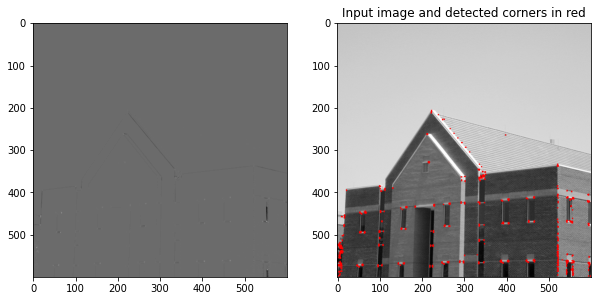

Value of K:  0.24 Value of T:  0.01


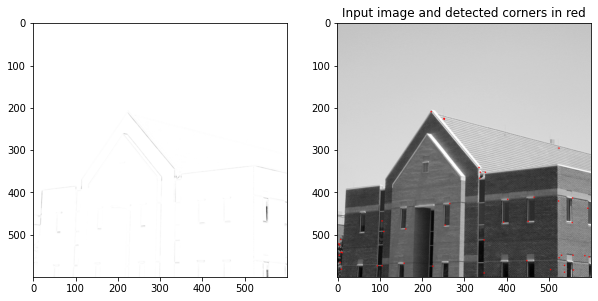

Value of K:  0.17 Value of T:  0.05


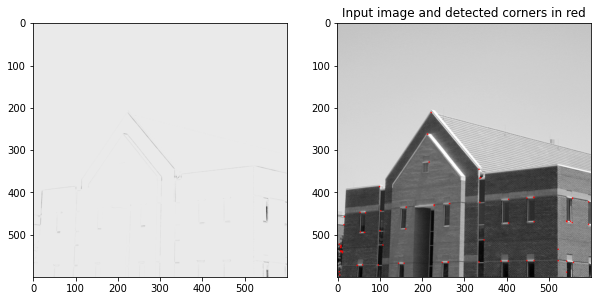

Value of K:  0.04 Value of T:  0.05


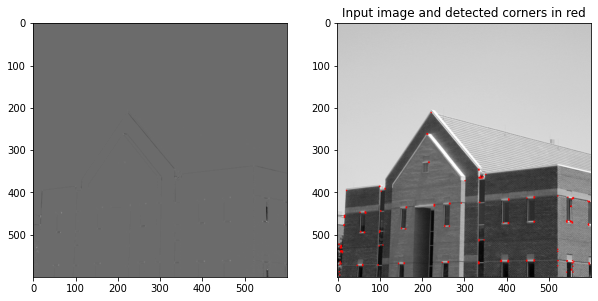

Value of K:  0.04 Value of T:  0.07


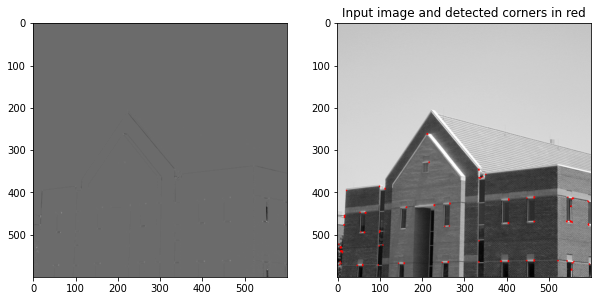

In [65]:
### your code & explanations
### your code & explanations
img = cv2.imread(images_path + 'building-600by600.tif')
img_gray = cv2.imread(images_path + 'building-600by600.tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    sys.exit('Input image not found, check the path')
#plt.title('Input image')
#plt.imshow(img, 'gray')

K=[0.04,0.24,0.17,0.04,0.04]
T=[0.01,0.01,0.05,0.05,0.07]

for i in range(len(K)):
    #Compute the R scores with standard k=0.04
    print('Value of K: ',K[i], 'Value of T: ',T[i])
    img_gray_cop=img_gray.copy()
    img_cop=img.copy()
    k = K[i]
    corners = cv2.cornerHarris(img_gray_cop, 2, 3, k)  
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(corners, 'gray')
    #Dilate the result for marking the corners in the output image, only for viewing. We use the cv2 implementation for dilation
    corners = cv2.dilate(corners, None)

    # Threshold for an optimal value, it may vary depending on the image.
    # A standard threshold is T=0.01
    t = T[i]

    # To plot the corners in red:
    img_cop[corners > t*corners.max()] = [255, 0, 0]           

    ax[1].imshow(img_cop), ax[1].set_title('Input image and detected corners in red'), plt.show()
    plt.show()

#### Your answer
- With k=0.04 and T=0.01 the corners are detected quite well although there are also quite a few errors since there are quite a few edges that are classified as corners.
- With k=0.24 and T=0.01, the number of errors in the classification of the corners is quite high, but there are some that are not detected.
- With k=0.17 and T=0.05 a good balance is achieved between the number of corners detected and errors. There are practically no errors and almost every corner is detected.
- With k=0.04 and T=0.05 we achieve a result similar to the previous one, some more corners are detected than before but there are also some more errors. Still, it's a pretty good result.
- With k=0.04 and T=0.07 a good result is also achieved as in the previous two. There are hardly any bad classifications and no corners that are left unclassified.



**Exercise 9 [0.20 pts]: Rotation and intensity change**   
1. Rotate the original image 5º and compute corners using the Harris detector with default parameters (k=0.04 and T=0.01).
Are these results adequate for matching the 2 images? Can you suggest more optimal ones?
2. Change the image intensity using the ```np.log()``` to enhance de darkest areas. Then compute the corners with the same parameters as previous e)(k=0.04 and T=0.07). Are these results adequate for matching the 2 images? Can you suggest more optimal ones?

(<matplotlib.image.AxesImage at 0x7fbcb4bb7850>,
 Text(0.5, 1.0, 'Rotated image'))

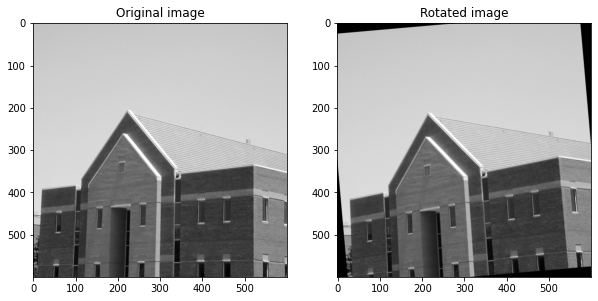

In [66]:
# Rotate image
angle = 5
img = cv2.imread(images_path + 'building-600by600.tif')
rows,cols,ch = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
rot_img = cv2.warpAffine(img,M,(cols,rows),cv2.INTER_CUBIC)

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rot_img_gray = cv2.cvtColor(rot_img,cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Original image')
ax[1].imshow(rot_img, cmap='gray'), ax[1].set_title('Rotated image')

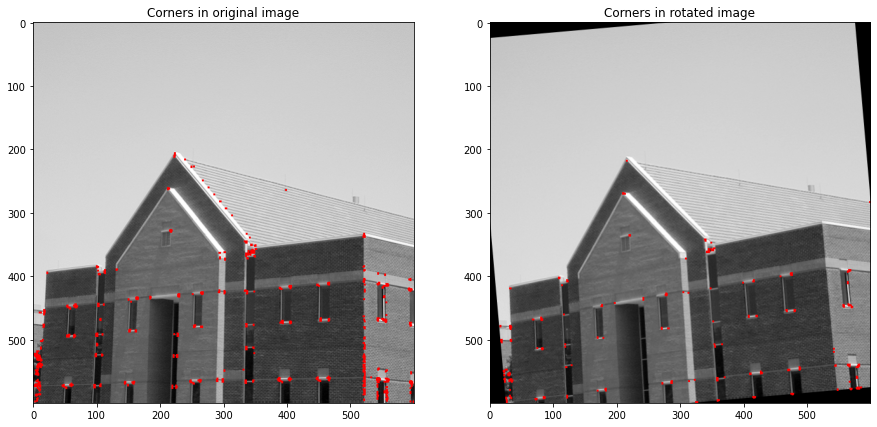

In [67]:
### your code & explanations

k = 0.04

corners = cv2.cornerHarris(img_gray, 2, 3, k)  
corners_r = cv2.cornerHarris(rot_img_gray, 2, 3, k)  

#Dilate the result for marking the corners in the output image, only for viewing. We use the cv2 implementation for dilation
corners = cv2.dilate(corners, None)
corners_r = cv2.dilate(corners_r, None)

# Threshold for an optimal value, it may vary depending on the image.
# A standard threshold is T=0.01
T = 0.01

# To plot the corners in red:
img[corners > T*corners.max()] = [255, 0, 0]           
rot_img[corners_r > T*corners_r.max()] = [255, 0, 0]           

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img, 'gray'), ax[0].set_title('Corners in original image')
ax[1].imshow(rot_img,'gray'), ax[1].set_title('Corners in rotated image')
plt.show()



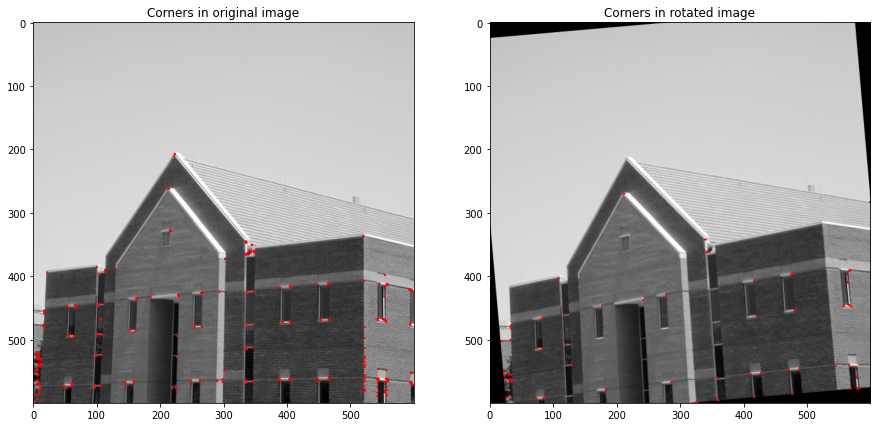

In [68]:
##Other sugestion for rotated image

angle = 5
img = cv2.imread(images_path + 'building-600by600.tif')
rows,cols,ch = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
rot_img = cv2.warpAffine(img,M,(cols,rows),cv2.INTER_CUBIC)

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rot_img_gray = cv2.cvtColor(rot_img,cv2.COLOR_BGR2GRAY)


k = 0.08

corners = cv2.cornerHarris(img_gray, 2, 3, k)  
corners_r = cv2.cornerHarris(rot_img_gray, 2, 3, k)  

#Dilate the result for marking the corners in the output image, only for viewing. We use the cv2 implementation for dilation
corners = cv2.dilate(corners, None)
corners_r = cv2.dilate(corners_r, None)

# Threshold for an optimal value, it may vary depending on the image.
# A standard threshold is T=0.01
T = 0.02

# To plot the corners in red:
img[corners > T*corners.max()] = [255, 0, 0]           
rot_img[corners_r > T*corners_r.max()] = [255, 0, 0]           

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img, 'gray'), ax[0].set_title('Corners in original image')
ax[1].imshow(rot_img,'gray'), ax[1].set_title('Corners in rotated image')
plt.show()


#### Your answer

With the default values of k=0.04 and T=0.01, good detection is achieved in both images, but in the original image there are too many corner errors that are not corners. By changing the values to k=0.08 and T=0.02 we reduce the number of errors in the original image and consequently the number of detections in the rotated image decreases.

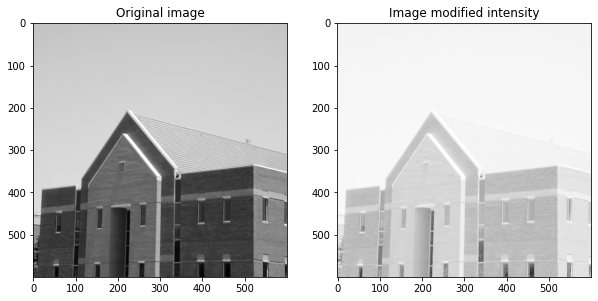

In [69]:
# Change image intensity
from skimage.exposure import rescale_intensity

img = cv2.imread(images_path + 'building-600by600.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img_float = np.float32(gray)
img_intensity_dark = np.log(img_float + 1) # Since log(0) is not defined, add 1 to the image

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Original image')
ax[1].imshow(img_intensity_dark, cmap='gray'), ax[1].set_title('Image modified intensity');

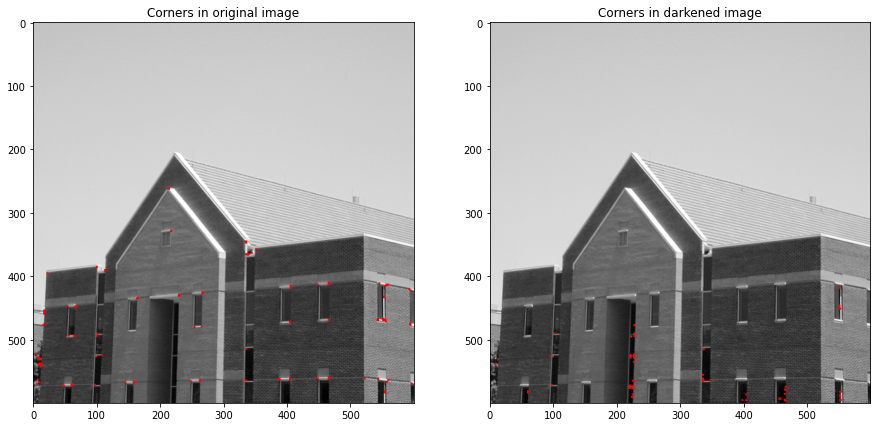

In [70]:
### your code & explanations
### your code & explanations

k = 0.04

corners = cv2.cornerHarris(gray, 2, 3, k)  
corners_r = cv2.cornerHarris(img_intensity_dark, 2, 3, k)  

#Dilate the result for marking the corners in the output image, only for viewing. We use the cv2 implementation for dilation
corners = cv2.dilate(corners, None)
corners_r = cv2.dilate(corners_r, None)

# Threshold for an optimal value, it may vary depending on the image.
# A standard threshold is T=0.01
T = 0.07

img_cop=img.copy()
# To plot the corners in red:
img[corners > T*corners.max()] = [255, 0, 0]           
img_cop[corners_r > T*corners_r.max()] = [255, 0, 0]           

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img, 'gray'), ax[0].set_title('Corners in original image')
ax[1].imshow(img_cop,'gray'), ax[1].set_title('Corners in darkened image')
plt.show()



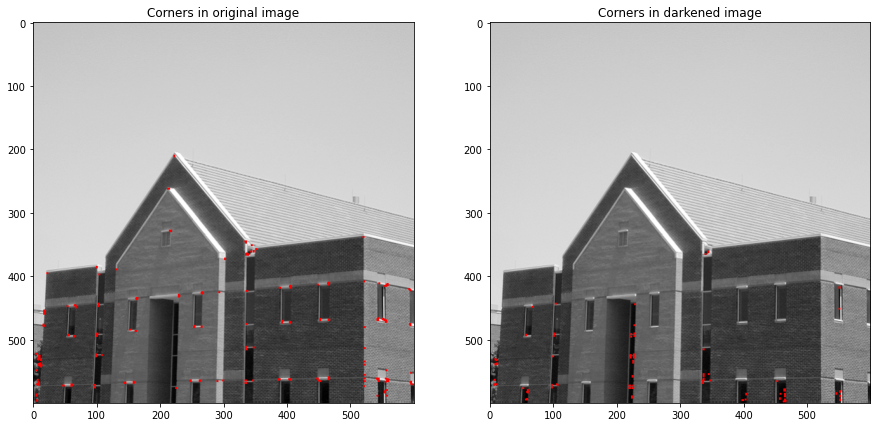

In [71]:
#Other sugestion for darkened image
# Change image intensity
from skimage.exposure import rescale_intensity

img = cv2.imread(images_path + 'building-600by600.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img_float = np.float32(gray)
img_intensity_dark = np.log(img_float + 1) # Since log(0) is not defined, add 1 to the image

k = 0.09

corners = cv2.cornerHarris(gray, 2, 3, k)  
corners_r = cv2.cornerHarris(img_intensity_dark, 2, 3, k)  

#Dilate the result for marking the corners in the output image, only for viewing. We use the cv2 implementation for dilation
corners = cv2.dilate(corners, None)
corners_r = cv2.dilate(corners_r, None)

# Threshold for an optimal value, it may vary depending on the image.
# A standard threshold is T=0.01
T = 0.03

img_cop=img.copy()
# To plot the corners in red:
img[corners > T*corners.max()] = [255, 0, 0]           
img_cop[corners_r > T*corners_r.max()] = [255, 0, 0]           

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(img, 'gray'), ax[0].set_title('Corners in original image')
ax[1].imshow(img_cop,'gray'), ax[1].set_title('Corners in darkened image')
plt.show()


#### Your answer
With the default values of k=0.04 and T=0.07, good corner detection is achieved in the original image but quite poor in the darker image. After testing with several values, with k=0.09 and T=0.03 we managed to improve the detections in the darkest image a little but not much, since if we try to increase the detections in the dark image, false detections in the original image are made. very big